In [1]:
import os
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

"""
%run tools/detection/test.py \
  configs/detection/tfa/voc/split3/1shot/tfa_r101_fpn_voc-split3_1shot-fine-tuning.py \
  work_dirs/voc/tfa/split3/1shot/tfa_r101_fpn_voc-split3_1shot-fine-tuning/iter_1000.pth --eval mAP
"""

%run tools/detection/test.py \
  configs/detection/tfa/voc/split3/10shot/tfa_r101_fpn_voc-split3_10shot-fine-tuning-regularization.py \
  work_dirs/voc/tfa/split3/10shot/tfa_r101_fpn_voc-split3_10shot-fine-tuning-regularization/iter_1000.pth --eval mAP

2022-03-30 17:42:39,674 - mmfewshot - INFO - 
FewShotVOCDataset Test dataset with number of images 4952, and instance counts: 
+---------------+-------+-------------+-------+------------------+-------+-----------------+-------+----------------+-------+
| category      | count | category    | count | category         | count | category        | count | category       | count |
+---------------+-------+-------------+-------+------------------+-------+-----------------+-------+----------------+-------+
| 0 [aeroplane] | 285   | 1 [bicycle] | 337   | 2 [bird]         | 459   | 3 [bottle]      | 469   | 4 [bus]        | 213   |
| 5 [car]       | 1201  | 6 [chair]   | 756   | 7 [cow]          | 244   | 8 [diningtable] | 206   | 9 [dog]        | 489   |
| 10 [horse]    | 348   | 11 [person] | 4528  | 12 [pottedplant] | 480   | 13 [train]      | 282   | 14 [tvmonitor] | 308   |
| 15 [boat]     | 263   | 16 [cat]    | 358   | 17 [motorbike]   | 325   | 18 [sheep]      | 242   | 19 [sofa]      |

load checkpoint from local path: work_dirs/voc/tfa/split3/10shot/tfa_r101_fpn_voc-split3_10shot-fine-tuning-regularization/iter_1000.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>] 4952/4952, 9.6 task/s, elapsed: 515s, ETA:     0s
---------------iou_thr: 0.5---------------

+-------------+------+------+--------+-------+
| class       | gts  | dets | recall | ap    |
+-------------+------+------+--------+-------+
| aeroplane   | 285  | 764  | 0.944  | 0.871 |
| bicycle     | 337  | 1145 | 0.950  | 0.873 |
| bird        | 459  | 1171 | 0.911  | 0.824 |
| bottle      | 469  | 1733 | 0.887  | 0.750 |
| bus         | 213  | 1027 | 0.967  | 0.869 |
| car         | 1201 | 3569 | 0.980  | 0.879 |
| chair       | 756  | 2870 | 0.853  | 0.684 |
| cow         | 244  | 1064 | 0.984  | 0.820 |
| diningtable | 206  | 1765 | 0.947  | 0.768 |
| dog         | 489  | 1430 | 0.973  | 0.843 |
| horse       | 348  | 1272 | 0.977  | 0.888 |
| person      | 4528 | 7880 | 0.932  | 0.871 |
| pottedplant | 480  | 1426 | 0.77

9
11
13
19
6
5
12
8
10
16
7
4
1
17
2
14
18
0
15
3
(14976, 1024)


/home/zhaozhiyuan/anaconda3/envs/mmfewshot/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/home/zhaozhiyuan/anaconda3/envs/mmfewshot/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


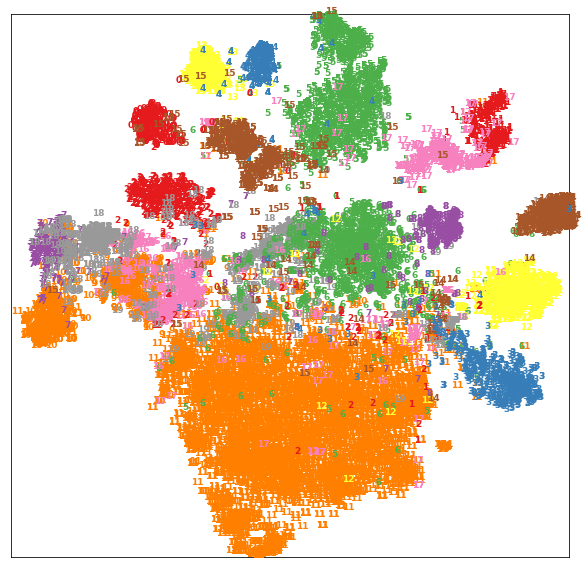

In [2]:
from sklearn.manifold import TSNE
import numpy as np
import os
import pickle
import random
from matplotlib import pyplot as plt

embeds_all = []
class_all = []
path = 'base_statistics/tsne/voc_gt_reg_1000'
for c in os.listdir(path):
    print(c)
    embeds = os.listdir(os.path.join(path,c))
    
    # sample
    #embeds = random.sample(embeds,100)
    
    for embed in embeds:
        #print(embed)
        if 'ipynb_checkpoints' in embed:
            continue
        #print(embed)
        f = open(os.path.join(path, c, embed), 'rb')
        embed = pickle.load(f)
        f.close()
        embeds_all.append(embed.tolist())
        class_all.append(int(c))
embeds_all = np.array(embeds_all)
print(embeds_all.shape)

tsne = TSNE(n_components=2, init='pca', random_state=0)
data = tsne.fit_transform(embeds_all)


x_min, x_max = np.min(data, 0), np.max(data, 0)
data = (data - x_min) / (x_max - x_min)
 
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)
for i in range(data.shape[0]):
    plt.text(data[i, 0], data[i, 1], str(class_all[i]),color=plt.cm.Set1(class_all[i] / 20.),fontdict={'weight': 'bold', 'size': 9})
    plt.xticks([])
    plt.yticks([])
    #plt.title(title)
plt.show(fig)